# K-Nearest Neighbors


To make predictions for a new data point, the KNN algorithm finds the closest points in the training dataset.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

### KNN Classification

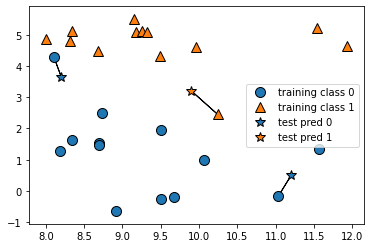

In [2]:
# When KNN considers only one nearest neighbor

mglearn.plots.plot_knn_classification(n_neighbors=1)

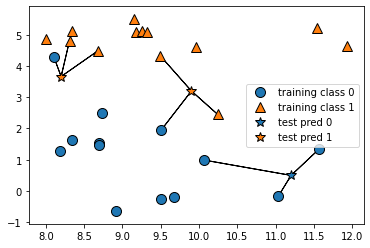

In [3]:
# When considering an arbitrary number of neighbors, voting is used to assign the label.
#Where the majority class among the neighbor is assigned.

mglearn.plots.plot_knn_classification(n_neighbors=3)

- This algorithm can be used for any number of classes and not just binary classification.

In [6]:
X, y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [7]:
# instantiating a class and setting parameters for the model.

clf = KNeighborsClassifier(n_neighbors=3)

#fit the classifier on training data
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# predictions on the test set

print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [9]:
# evaluating the how well the model generalises 

print( " Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))

 Test set accuracy: 0.86


##### Analysing KNN classifier

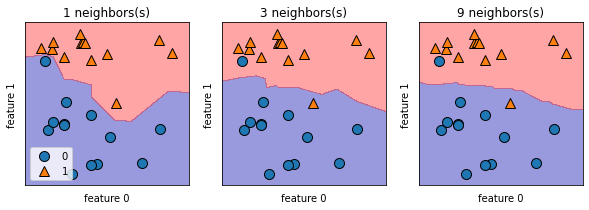

In [10]:
# Code to understand the decision boundary assignment.

fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

- using single neighbors results in decision boundary that overfits. (higher model complexity)
- considering more number of neighbors leads to smooth decision boundaries. (simpler models)

##### Understanding model complexity and generalisation using Breast Cancer Dataset and KNN

In [11]:
from sklearn.datasets import load_breast_cancer

In [13]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target,random_state=66)

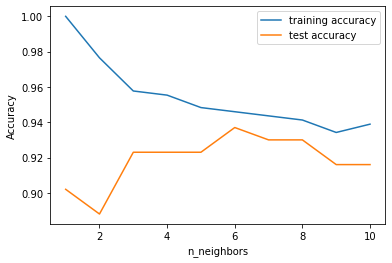

In [14]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### KNN regressor

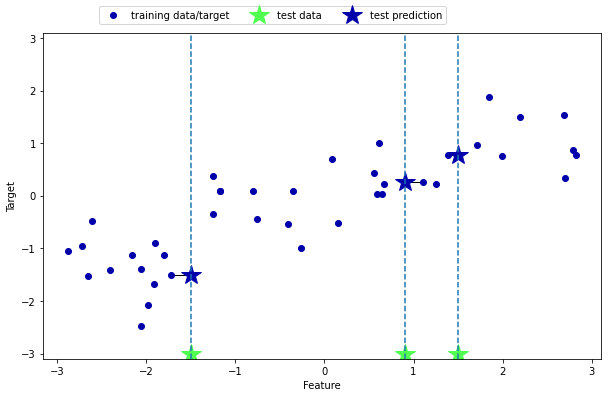

In [15]:
# Predicting on wave dataset using knn regressor

mglearn.plots.plot_knn_regression(n_neighbors=1)

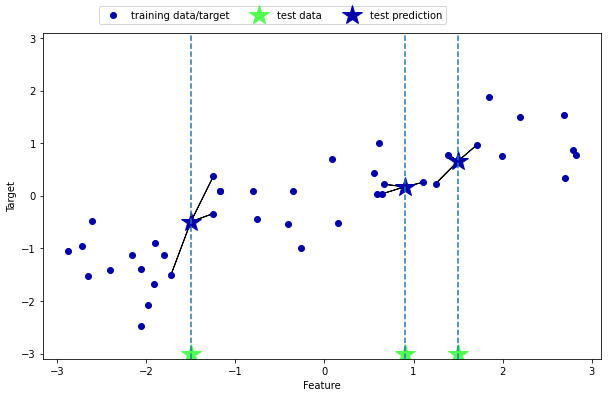

In [16]:
# Predicting using more than one neighbor where the prediction tends to be average or mean of relevant neighbors

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [18]:
# Regression on wavedataset

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


The coefficient of determination(R2) is a measure of goodness of prediction for a regression model.
Value of R2 lies between 1 (perfect prediction) to 0 (constant model that predicts the mean of training set).

In [20]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


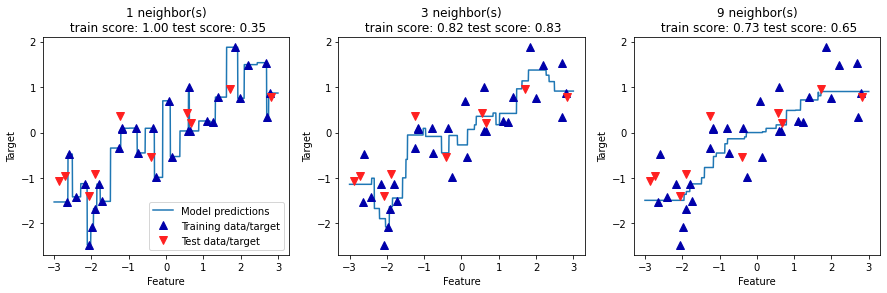

In [26]:
#

fig, axes = plt.subplots(1,3,figsize=(15,4))
#create 1000 data points

line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions","Training data/target","Test data/target"], loc="best")

- single neighbor model each point has influence on prediction. This leads to unsteady prediction.
- more neighbors smoother predictions but might not fit the data well.

#### Points to Remember

- Adjusting the number of neighbors parameter usually gives a good model. Small number such as 3,5 often works well.
- By default euclidean distance is used as distance measure.
- Model is easy to understand.
- Large datasets may lead to slower predictions.
- Does not perform well with datasets that have large number of features and also those that are sparse.